# Inaugural Project

Imports and set magics:

In [6]:
# import numpy, optimize and plot
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# predefine options for all plots
plt.rcParams.update({"axes.grid":True, "grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 12})

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# import own module
from inauguralproject import exchange_economy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exchange economy

Firstly, we create a class for the exchange economy (see python file) and create an instance of that class with the initial endowments: $\omega_1^A = 0.8$ and $\omega_2^A = 0.3$.

In [7]:
model = exchange_economy(0.8,0.3)

# Question 1

To find the values of $x_1^A$ and $x_2^A$ that are Pareto improvements, we create a loop that compares the utility of every combination of $x_1^A$ and $x_2^A$ to the endowment utilities. If the utility is greater than the endowment for both consumers, $x_1^A$ and $x_2^A$ is stored in a list, which is then plotted in the edgeworth box together with the endowment point. 

In [8]:
# list of possible x1_A and x2_A
N = 75
x1_As = np.arange(0, 1+1/N, 1/N)
x2_As = np.arange(0, 1+1/N, 1/N)

# endowment utility
uA_endow = model.uA(model.omegaA_1, model.omegaA_2)
uB_endow = model.uB(model.omegaB_1, model.omegaB_2)

# define empty lists to store results
setC = []

# loop over every combination of x1_A and x2_A and store value if utility is higher than endowment
for x1_A in x1_As:
    for x2_A in x2_As:
         if (model.uA(x1_A,x2_A) >= uA_endow) and (model.uB((1-x1_A),(1-x2_A)) >= uB_endow):
             setC.append((x1_A, x2_A))

In [ ]:
# unzip list
C_x1, C_x2 = zip(*setC)

# plot set C
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

ax.scatter(C_x1, C_x2, c = 'xkcd:dark sky blue', marker = '.', s =10, label= "Set C")
ax.scatter(model.omegaA_1, model.omegaA_2, c = 'xkcd:red', marker = 'o', s = 20, label = "Endowment point")

ax.set_title('Edgeworth box');
ax.set_xlabel('$x_1^A$');
ax.set_ylabel('$x_2^A$', rotation=0);

ax.set_xlim(0,1);
ax.set_ylim(0,1);
ax.legend(loc='lower left');

# add secondary axes for consumer B
ax2 = ax.twinx()
ax2.invert_yaxis()
ax2.set_ylabel('$x_2^B$', rotation=0);

ax2 = ax.twiny()
ax2.invert_xaxis()
ax2.set_xlabel('$x_1^B$');

# Question 2

We define the set $P_1$ and find the two errors, which is then illustrated in the same figure.

In [10]:
# define P1 area
P1 = np.arange(0.5, 2.5+2/N, 2/N)

# errors
error1, error2 = model.clearing_error(P1)

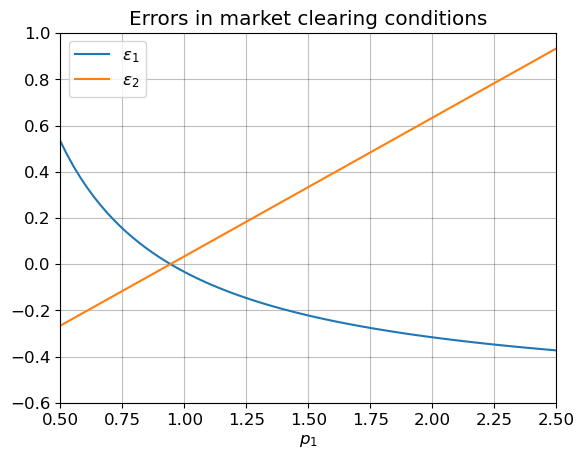

In [11]:
#plot
fig2 = plt.figure()
ax = fig2.add_subplot(1,1,1)

ax.plot(P1, error1, label='$\epsilon_1$')
ax.plot(P1, error2, label='$\epsilon_2$')

ax.set_title('Errors in market clearing conditions')
ax.set_xlabel('$p_1$')
ax.set_xlim(0.5,2.5);
ax.set_ylim(-0.6,1);
ax.legend(loc='upper left');

From the figure we can se that the market errors intersect at 0. This is expected, since when one market clears, so does the other. 

# Question 3

We find the market clearing price by finding when the market clearing conditions holds, that is $\epsilon_1 =0$. We only need to check one error, since when one market clears the other does too.

In [12]:
# call solver inside class
p1_clear = model.eq()

# find allocations
clear_alA = model.demandA(p1_clear)
clear_alB = model.demandB(p1_clear)

print(f'The market clearing price is p1 = {p1_clear:.3f} resulting in allocation:')
print(f'(x1_A, x2_A) = ({clear_alA[0]:.3f}, {clear_alA[1]:.3f})')
print(f'(x1_B, x2_B) = ({clear_alB[0]:.3f}, {clear_alB[1]:.3f})')

The market clearing price is p1 = 0.944 resulting in allocation:
(x1_A, x2_A) = (0.373, 0.704)
(x1_B, x2_B) = (0.627, 0.296)


# Question 4

**A)**

For every p1 in P1, We calculate consumer B's consumption of good 1 and 2 and compute the utility of A consuming the rest. We then compare the utility of consumer A with the higest utility so far and save the new higest utility and the corresponding p1 and allocation.

In [13]:
# initialize max utility
ps_best_uA = -np.inf

# compare utility, update and find best uA from P1
for p1 in P1:
    x1_B, x2_B = model.demandB(p1)
    if (1 >= x1_B and 1 >= x2_B): #ensure that B's consumption is less than or equal to 1
        utility = model.uA(1-x1_B,1-x2_B)
        if utility > ps_best_uA:
            ps_best_uA = utility
            ps_best_p1 = p1
            ps_best_alB = x1_B, x2_B

# find allocation          
ps_best_alA = 1 - ps_best_alB[0], 1 - ps_best_alB[1]

print(f'The price in P1 that gives the higest utility is p1 = {ps_best_p1:.3f} with the corresponding utility uA = {ps_best_uA:.3f} and allocation:')
print(f'(x1_A, x2_A) = ({ps_best_alA[0]:.3f}, {ps_best_alA[1]:.3f})')
print(f'(x1_B, x2_B) = ({ps_best_alB[0]:.3f}, {ps_best_alB[1]:.3f})')

The price in P1 that gives the higest utility is p1 = 1.887 with the corresponding utility uA = 0.634 and allocation:
(x1_A, x2_A) = (0.619, 0.641)
(x1_B, x2_B) = (0.381, 0.359)


**B)**

Now we find the optimal allocation when the price is not limited to the set of P1. Here, we simply use scipy's minimize function to find the p1 that maximizes consumer A's utility given consumer B's demand functions.

In [16]:
# objective function (negative utility function taking B's consumption as input)
def objective_ps(p1):
    x1_B, x2_B = model.demandB(p1)
    return -model.uA(1-x1_B, 1-x2_B)

# contraint - violated if p1 is negative
constraint_ps = ({'type': 'ineq', 'fun': lambda p1:  p1}) #

# call solver
p1_guess2 = ps_best_p1 # initial guess is the best price in P1
sol_ps = optimize.minimize(objective_ps, p1_guess2, method='SLSQP', constraints=constraint_ps)

# unpack solution
ps_max_p1 = sol_ps.x[0]
ps_max_alB = model.demandB(ps_max_p1)
ps_max_alA = (1-ps_max_alB[0], 1-ps_max_alB[1]) 
ps_max_uA = model.uA(ps_max_alA[0], ps_max_alA[1])

print(f'The price that maximizes utility is p1 = {ps_max_p1:.3f} with the corresponding utility uA = {ps_max_uA:.3f} and allocation:')
print(f'(x1_A, x2_A) = ({ps_max_alA[0]:.3f}, {ps_max_alA[1]:.3f})')
print(f'(x1_B, x2_B) = ({ps_max_alB[0]:.3f}, {ps_max_alB[1]:.3f})')

The price that maximizes utility is p1 = 1.887 with the corresponding utility uA = 0.634 and allocation:
(x1_A, x2_A) = (0.619, 0.641)
(x1_B, x2_B) = (0.381, 0.359)


# Question 5

**A)**

For every $x_1^A, x_2^A$ in C (from question 1), we calculate consumer A's utility and compare it with the higest utility so far and save the new higest utility and the corresponding allocation.

In [17]:
# initilize max value
mm_best_uA = -np.inf

# loop through possible max uA and save highest continuously
for x1, x2 in setC:
     utility = model.uA(x1, x2)
     if utility > mm_best_uA:
        mm_best_uA = utility
        mm_best_alA = x1, x2

# allocations
mm_best_alB = 1 - mm_best_alA[0], 1 - mm_best_alA[1]

print(f'The allocation in C that gives the higest utility is:')
print(f'(x1_A, x2_A) = ({mm_best_alA[0]:.3f}, {mm_best_alA[1]:.3f})')
print(f'(x1_B, x2_B) = ({mm_best_alB[0]:.3f}, {mm_best_alB[1]:.3f})')
print(f'with the corresponding utility uA = {mm_best_uA:.3f}')

The allocation in C that gives the higest utility is:
(x1_A, x2_A) = (0.560, 0.853)
(x1_B, x2_B) = (0.440, 0.147)
with the corresponding utility uA = 0.742


**B)**

We again use scipy's minimize function to find the ($x_1^A, x_2^A$) that maximizes consumer A's utility given that consumer B should be at least as well of as if they consumed their endowment.

In [21]:
# objective function (negative utility)
def utility_mm(xA):
    return - model.uA(xA[0],xA[1])

# constraints and bounds
constraint_mm = ({'type': 'ineq', 'fun': lambda xA: model.uB(1-xA[0], 1-xA[1]) - uB_endow})
bounds_mm = ((0,1),(0,1))

# call solver
mm_guess = [mm_best_alA[0], mm_best_alA[1]] #initial guess is the best allocation in C
sol_mm = optimize.minimize(utility_mm, mm_guess, method='SLSQP', bounds=bounds_mm, constraints=constraint_mm)

# unpack solution
mm_max_alA = sol_mm.x
mm_max_alB = (1-mm_max_alA[0], 1-mm_max_alA[1]) 
mm_max_uA = - sol_mm.fun

print(f'The allocation that maximizes the utility is:')
print(f'(x1_A, x2_A) = ({mm_max_alA[0]:.3f}, {mm_max_alA[1]:.3f})')
print(f'(x1_B, x2_B) = ({mm_max_alB[0]:.3f}, {mm_max_alB[1]:.3f})')
print(f'with the corresponding utility uA = {mm_max_uA:.3f}')


The allocation that maximizes the utility is:
(x1_A, x2_A) = (0.576, 0.844)
(x1_B, x2_B) = (0.424, 0.156)
with the corresponding utility uA = 0.743


# Question 6

**A)**

We again use scipy's minimize function to now find the ($x_1^A, x_2^A$) that maximizes aggregate utility.

In [22]:
# objective function (negative aggregate utility)
def utility_so(xA):
    return - (model.uA(xA[0],xA[1]) + model.uB(1-xA[0], 1-xA[1]))

# call solver
bounds_so = ((0,1),(0,1))
so_guess = [0.8,0.3]
sol_so = optimize.minimize(utility_so, so_guess, method='SLSQP', bounds=bounds_so)

# unpack solution
so_max_alA = sol_so.x
so_max_alB = (1-so_max_alA[0], 1-so_max_alA[1]) 
so_max_uA = model.uA(so_max_alA[0], so_max_alA[1])
so_max_uB = model.uB(so_max_alB[0], so_max_alB[1])
so_max_U = - sol_so.fun

print(f'The allocation that maximizes aggregate utility is:')
print(f'(x1_A, x2_A) = ({so_max_alA[0]:.3f}, {so_max_alA[1]:.3f})')
print(f'(x1_B, x2_B) = ({so_max_alB[0]:.3f}, {so_max_alB[1]:.3f})')
print(f'with the corresponding utilities uA = {so_max_uA:.3f}, uB = {so_max_uB:.3f} and aggregate utility U = {so_max_U:.3f}')

The allocation that maximizes aggregate utility is:
(x1_A, x2_A) = (0.333, 0.667)
(x1_B, x2_B) = (0.667, 0.333)
with the corresponding utilities uA = 0.529, uB = 0.529 and aggregate utility U = 1.058


The two consumers recieve the same amount of opposite goods, which is as expected since the two consumer are identical with respect to opposite goods (the demand functions are identical, it is only the value of $\alpha$ and $\beta$ that are reversed).

**B)**

We plot the different allocations in questions 3-6.

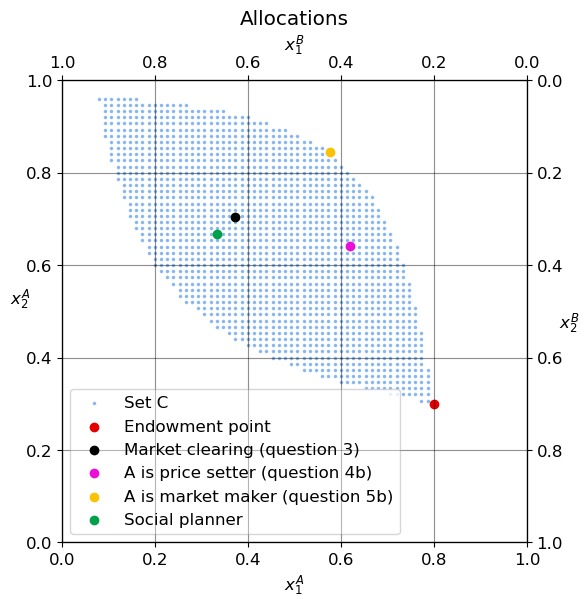

In [23]:
# plot allocations
fig3 = plt.figure(figsize=(6,6))
ax = fig3.add_subplot(1,1,1)

# set C and endowment point
ax.scatter(C_x1, C_x2, c = 'xkcd:dark sky blue', marker = '.', s =10, alpha = 0.5, label= "Set C")
ax.scatter(model.omegaA_1, model.omegaA_2, c = 'xkcd:red', marker = 'o', label = "Endowment point")

# allocations
ax.scatter(clear_alA[0], clear_alA[1],c = 'black', label='Market clearing (question 3)')
ax.scatter(ps_max_alA[0], ps_max_alA[1], c = 'xkcd:fuchsia',  label = "A is price setter (question 4b)")
ax.scatter(mm_max_alA[0], mm_max_alA[1], c = 'xkcd:goldenrod',  label = "A is market maker (question 5b)")
ax.scatter(so_max_alA[0], so_max_alA[1], c = 'xkcd:emerald', label = "Social planner")

ax.set_title('Allocations')
ax.set_xlabel('$x_1^A$')
ax.set_ylabel('$x_2^A$', rotation=0)
ax.set_xlim(0,1);
ax.set_ylim(0,1);

ax.legend(loc='lower left');

# add secondary axes for consumer B
ax2 = ax.twinx()
ax2.invert_yaxis()
ax2.set_ylabel('$x_2^B$', rotation=0);

ax2 = ax.twiny()
ax2.invert_xaxis()
ax2.set_xlabel('$x_1^B$');


From this we see, the when A has some market power either in terms of price setter or market maker, A benefits compared to the market equilibrium. This is especially true when A is a maket maker as A has full control over B's consumption, whereas a price setter is constrained by B's demand function. In the social optimum, A consumes less of both goods as opposed to the market equilibirum, where A's higher total endowment is reflected in higher consumption of both goods.

# Question 7

Here, we use numpy to draw random numbers from a uniform distribution.

In [24]:
# set seed
np.random.seed(1707)

# generate W
elements = 50
W = np.random.uniform(low=[0,0],high=[1,1],size=(elements,2))

# Question 8

We follow the same procedure as in question 3. For every pair of $\omega_1^A$ and $\omega_2^A$ in $W$, we create a new instance of the exchange economy class and find the equilibrium price and the corresponding allocations.

In [25]:
# define empty lists to store results
market_eqs = []

# loop over
for omega1_A, omega2_A in W:
   temp_model = exchange_economy(omega1_A, omega2_A)
   eq_p1 = temp_model.eq()
   market_eqs.append(temp_model.demandA(eq_p1))

# unzip list
eq_x1_A, eq_x2_A = zip(*market_eqs)

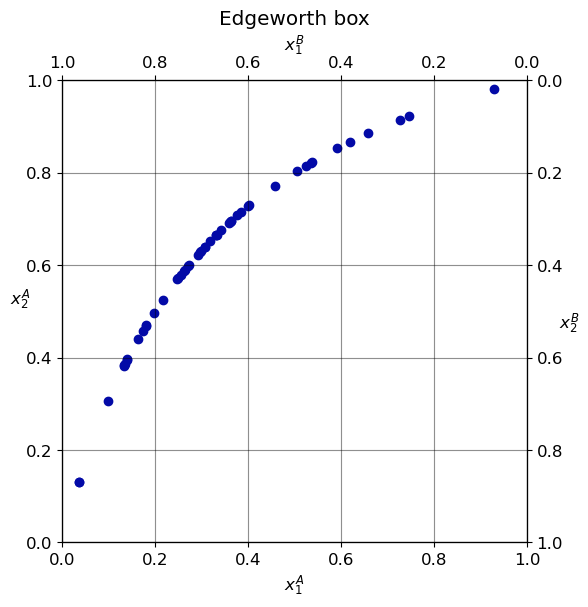

In [26]:
# plot allocations
fig4 = plt.figure(figsize=(6,6))
ax = fig4.add_subplot(1,1,1)

ax.scatter(eq_x1_A, eq_x2_A, c = 'xkcd:cobalt blue', marker = 'o')

ax.set_title('Edgeworth box');
ax.set_xlabel('$x_1^A$');
ax.set_ylabel('$x_2^A$', rotation=0);
ax.set_xlim(0,1);
ax.set_ylim(0,1);

# add secondary axes for consumer B
ax2 = ax.twinx()
ax2.invert_yaxis()
ax2.set_ylabel('$x_2^B$', rotation=0);

ax2 = ax.twiny()
ax2.invert_xaxis()
ax2.set_xlabel('$x_1^B$');

This figure illustrates the contract curve, which shows all the pareto effecient allocations, the two consumers could reach through trade. All points on the curve are just as "good" as the others - which one is reached depends on the initial endowments.